In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from unity_environment_wrapper import unity_env, str_numbers
from Multi_Agent_DDPG import Multi_MA_DDPG


In [2]:
def fix_state6(self,state,prev_state=None):
    state = np.reshape(state,(3,8))[:,0:6]
    if prev_state is None:
        state[0,:] = state[2,:]
        state[1,:] = state[2,:]
    else:
        state[0,:] = prev_state[6:12]
        state[1,:] = prev_state[12:]
        #if abs(state[2,0]-state[1,0]) < 1e-6:
        #    state[2,2] = 0.0
        #if abs(state[2,1]-state[1,1]) < 1e-6:
        #    state[2,3] = 0.0
    return state.reshape(-1)

def fix_state4(self,state,prev_state=None):
    state = np.reshape(state,(3,8))[:,[0,1,4,5]]
    if prev_state is None:
        state[0,:] = state[2,:]
        state[1,:] = state[2,:]
    else:
        state[0,:] = prev_state[4:8]
        state[1,:] = prev_state[8:]
    return state.reshape(-1)

def modify_batch6(self):
    if self.duplicate_augmented_batch > 1:
        ind_start = self.batch_size
        ind_end = self.batch_size*2
        self.states[ind_start:ind_end,:,[4,10,16]] *= -1
        self.next_states[ind_start:ind_end,:,[4,10,16]] *= -1
        self.states[ind_start:ind_end,[0,1],:]      = self.states[ind_start:ind_end,[1,0],:]
        self.actions[ind_start:ind_end,[0,1],:]     = self.actions[ind_start:ind_end,[1,0],:]
        self.next_states[ind_start:ind_end,[0,1],:] = self.next_states[ind_start:ind_end,[1,0],:]
        if self.rewards.shape[1] > 1:
            self.rewards[ind_start:ind_end,[0,1]]   = self.rewards[ind_start:ind_end,[1,0]]
        if self.dones.shape[1] > 1:
            self.dones[ind_start:ind_end,[0,1]]     = self.dones[ind_start:ind_end,[1,0]]

def modify_batch4(self):
    if self.duplicate_augmented_batch > 1:
        ind_start = self.batch_size
        ind_end = self.batch_size*2
        self.states[ind_start:ind_end,:,[2,6,10]] *= -1
        self.next_states[ind_start:ind_end,:,[2,6,10]] *= -1
        self.states[ind_start:ind_end,[0,1],:]      = self.states[ind_start:ind_end,[1,0],:]
        self.actions[ind_start:ind_end,[0,1],:]     = self.actions[ind_start:ind_end,[1,0],:]
        self.next_states[ind_start:ind_end,[0,1],:] = self.next_states[ind_start:ind_end,[1,0],:]
        if self.rewards.shape[1] > 1:
            self.rewards[ind_start:ind_end,[0,1]]   = self.rewards[ind_start:ind_end,[1,0]]
        if self.dones.shape[1] > 1:
            self.dones[ind_start:ind_end,[0,1]]     = self.dones[ind_start:ind_end,[1,0]]

def modify_batch4_abs(self):
    np.abs(self.states[:,:,[2,6,10]], out=self.states[:,:,[2,6,10]])
    np.abs(self.next_states[:,:,[2,6,10]], out=self.next_states[:,:,[2,6,10]])
    if self.duplicate_augmented_batch > 1:
        ind_start = self.batch_size
        ind_end = self.batch_size*2
        self.states[ind_start:ind_end,[0,1],:]      = self.states[ind_start:ind_end,[1,0],:]
        self.actions[ind_start:ind_end,[0,1],:]     = self.actions[ind_start:ind_end,[1,0],:]
        self.next_states[ind_start:ind_end,[0,1],:] = self.next_states[ind_start:ind_end,[1,0],:]
        if self.rewards.shape[1] > 1:
            self.rewards[ind_start:ind_end,[0,1]]   = self.rewards[ind_start:ind_end,[1,0]]
        if self.dones.shape[1] > 1:
            self.dones[ind_start:ind_end,[0,1]]     = self.dones[ind_start:ind_end,[1,0]]

    

In [3]:
env = unity_env(file_name="Tennis_Windows_x86_64/Tennis.exe", no_graphics=True, score_goal=0.5, verbose_level=1,\
                set_modify_state=None) # fix_state4

    
agent = Multi_MA_DDPG(state_shape = env.state_shape, action_size = env.action_size, num_agents=env.num_agents,\
                       seed=1,\
                       replay_buffer_size = int(1e6),\
                       replay_batch_size =128,\
                      duplicate_augmented_times=1,\
                      set_modify_batch=None,\
                      # modify_batch4_abs
                       update_every=4,\
                       update_times=1,\
                       lr_actor=1e-5,\
                       lr_critic=1e-6,\
                       noise_sigma=0.2,\
                       noise_theta=0.1,\
                       no_reward_value = -0.001,\
                      # -0.02,\
                       actor_arch = ['b',128,'b','r',64,'b','r'],\
                       critic_arch = [['b',128,'b','r',64],['b',64,'b','r',32],['b','r',64,'b','r',1]],\
                       gamma = 0.95,\
                       use_cuda=True, verbose_level=2)

output_name = "results"

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Exploring Unity environment...
Selected brain name:  TennisBrain
Selected brain:       Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 
Number of actions:    2
Number of agents:     2
States have shape:    (24,)
State of agent 0 look like:
 [  0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000  -6.638  -1.500  -0.000   0.000   6.001   6.000  -0.000   0.000]
State of agent 1 look like:
 [  0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000  -7.079  -1.500   0.000   0.000  -6.001   6.000   0.000   0.000]
Initializing DDPG_Agent w

In [4]:
agent.reset()
all_scores, best_test_score, best_test_average, best_test_stdev = env.train(agent,output_name,num_episode_search=500,noise_decay=0.995)


Training DDPG agent:
output_filename    = results
noise_minimal      = 0.01
noise_decay        = 0.995
num_episode_search = 500
max_num_episodes   = 10000
score_window_size  = 100
Episode 600 curr=-0.01 	Average=0.000 Stdev=0.000 Composite=0.000 Max=0.000 	best len=8520 long_term len=0 highest=-0.01 
No more improvements. End of training.


## plot the scores

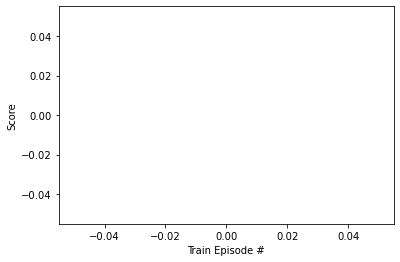

In [5]:
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(np.arange(len(all_scores)), all_scores)
plt.ylabel('Score')
plt.xlabel('Train Episode #')
plt.show()

In [6]:
agent.load(output_name)
test_composite, test_mean, test_stdev, test_scores = env.test_agent_on_many_episodes(agent)
print("Final Test scores on {} episodes:".format(len(test_scores)))
print("Mean score:    ",test_mean)
print("Std.Dev. score:",test_stdev)

env.test_agent_on_single_episode(agent)

RuntimeError: Error(s) in loading state_dict for Actor:
	Unexpected key(s) in state_dict: "layers_list.8.weight", "layers_list.8.bias", "layers_list.8.running_mean", "layers_list.8.running_var", "layers_list.8.num_batches_tracked", "layers_list.10.weight", "layers_list.10.bias". 
	size mismatch for layers_list.0.weight: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for layers_list.0.bias: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for layers_list.0.running_mean: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for layers_list.0.running_var: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for layers_list.1.weight: copying a param with shape torch.Size([256, 12]) from checkpoint, the shape in current model is torch.Size([128, 24]).
	size mismatch for layers_list.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layers_list.2.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layers_list.2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layers_list.2.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layers_list.2.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for layers_list.4.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([64, 128]).
	size mismatch for layers_list.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for layers_list.5.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for layers_list.5.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for layers_list.5.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for layers_list.5.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for layers_list.7.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([2, 64]).
	size mismatch for layers_list.7.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([2]).